## The Python Imaging Library (PIL)
The Python Imaging Library, which is known as PIL or PILLOW, is the main library we use in python for dealing with image files. This library is not included with python - it's what's known as a third party library, which means you have to download and install it yourself. In the Coursera system, this has all been done for you. Lets do a little exploring of pillow in the jupyter notebooks.

In [1]:
# You'll recall that we import a library using the `import` keyword.
import PIL

In [2]:
# Documentation is a big help in learning a library. There exist standards that make this process easier. 
# For example, most libraries let you check their version using the version attribute.
PIL.__version__

'5.4.1'

In [3]:
# Let's figure out how to open an image with `Pillow`. Python provides some built-in functions to help us
# understand the functions and objects which are available in libraries. For instance, the help function,
# when called on any object, returns the object’s built-in documentation. Lets try it with our new library
# module, PIL.
help(PIL)

Help on package PIL:

NAME
    PIL - Pillow (Fork of the Python Imaging Library)

DESCRIPTION
    Pillow is the friendly PIL fork by Alex Clark and Contributors.
        https://github.com/python-pillow/Pillow/
    
    Pillow is forked from PIL 1.1.7.
    
    PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
    Copyright (c) 1999 by Secret Labs AB.
    
    Use PIL.__version__ for this Pillow version.
    PIL.VERSION is the old PIL version and will be removed in the future.
    
    ;-)

PACKAGE CONTENTS
    BdfFontFile
    BlpImagePlugin
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImIm

In [4]:
# This shows us that there are a host of classes available to us in the module, as well as version information 
# and even the file, called __init__.py, which has the source code for the module itself. We could look up 
# the source code for this in the Jupyter console if we wanted to. These documentation standards make it easy
# to poke around an unexplored library.
#
# Python also has a function called dir() which will list the contents of an object. This is especially useful
# with modules where you might want to see what classes you might interact with. Lets list the details of 
# the PIL module
dir(PIL)

['PILLOW_VERSION',
 'VERSION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_plugins']

In [5]:
# At the top of the list, there is something called Image. This sounds like it could be interesting, so lets 
# import it directly, and run the help command on it.
from PIL import Image
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.Exception(builtins.BaseException)
        DecompressionBombError
    builtins.RuntimeWarning(buil

Running help() on Image tells us that this object is "the Image class wrapper". We see from the top level documentation about the image object that there is "hardly ever any reason to call the Image constructor directly", and they suggest that the open function might be the way to go.

In [6]:
# Lets call help on the open function to see what it's all about. Remember that since we want to pass in the
# function reference, and not run the function itself, we don't put paretheses behind the function name.
help(Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r')
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement :py:meth:`~file.read`,
       :py:meth:`~file.seek`, and :py:meth:`~file.tell` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :returns: An :py:class:`~PIL.Image.Image` object.
    :exception IOError: If the file cannot be found, or the image cannot be
       opened and identified.



In [7]:
# It looks like Image.open() is a function that loads an image from a file and returns an instance 
# of the Image class. Lets give it a try. In the read_only directory there is an image I've provided
# which is from our Master's of Information program recruitment flyer. Lets try and load that now

file="readonly/msi_recruitment.gif"
image=Image.open(file)
print(image)

<PIL.GifImagePlugin.GifImageFile image mode=P size=800x450 at 0x7FC9DD74CC18>


In [8]:
# Ok, we see that this returns us a kind of PIL.GifImagePlugin.GifImageFile. At first this might
# seem a bit confusing, since because we were told by the docs that we should be exepcting a
# PIL.Image.Image object back. But this is just object inheritance working! In fact, the object
# returned is both an Image and a GifImageFile. We can use the python inspect module to see this
# as the getmro function will return a list of all of the classes that are being inherited by a
# given object. Lets try it.

import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))

The type of the image is <class 'PIL.GifImagePlugin.GifImageFile'>


(PIL.GifImagePlugin.GifImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [9]:
# Now that we are comfortable with the object. How do we view the image? It turns out that the
# image object has a show function. You can find this by looking at all of the properties of
# the object if you wanted to, using the dir() function.
image.show()

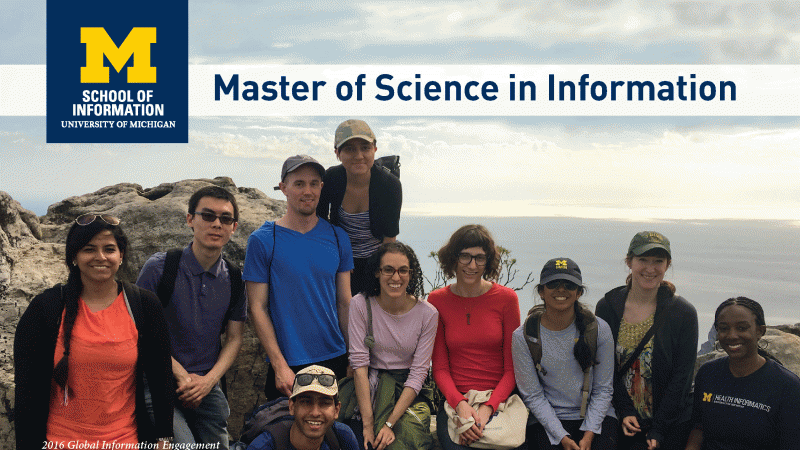

In [10]:
# Hrm, that didn't seem to have the intended effect. The problem is that the image is stored
# remotely, on Coursera's server, but show tries to show it locally to you. So, if the Coursera
# server software was running on someone's workstation in Mountain View California, where Coursera
# has its offices, then you just popped up a picture of our recruitment materials. Thanks! :)
# Instead, we want to render the image in the Jupyter notebook. It turns out Jupyter has a function
# which can help with this.
from IPython.display import display
display(image)

For those who would like to understand this in more detail, the Jupyter environment is running a special wrapper around the Python interpretor, called IPython. IPython allows the kernel back end to communicate with a browser front end, among other things. The IPython package has a display function which can take objects and use custom formatters in order to render them. A number of formatters are provided by default, including one which knows how to handle image types.

That's a quick overview of how to read and display images using pillow, in the next lecture we'll jump in a bit more detail to understand how to use pillow to manipulate images.